
Data Processing

1.1 Carga y Exploración Inicial

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv



Columnas disponibles en el dataset:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQu

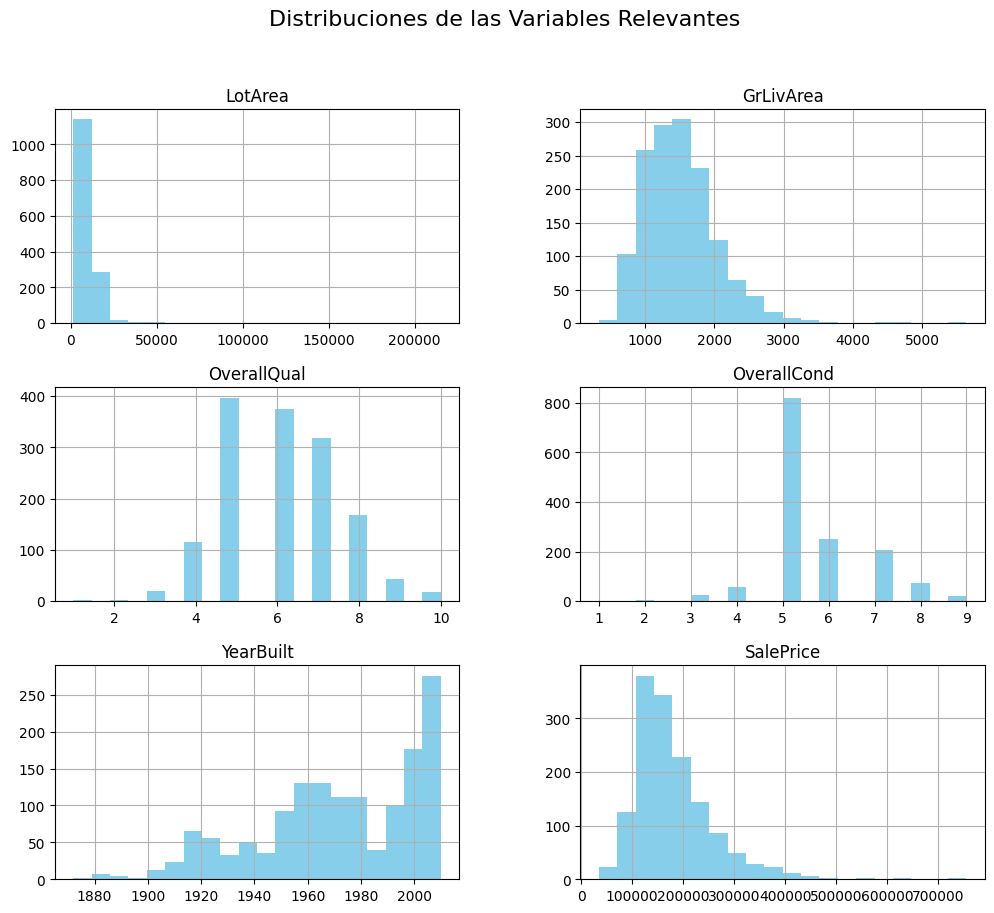

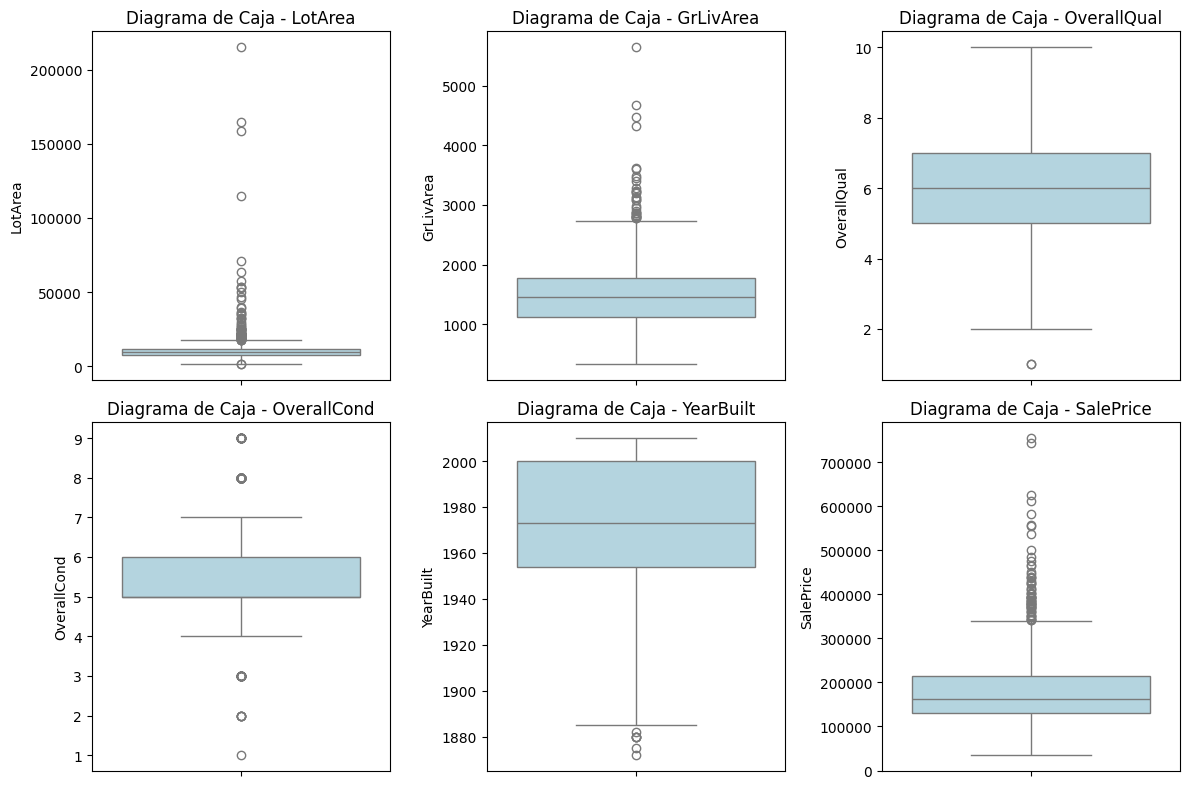

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de entrenamiento
train = pd.read_csv('train.csv')

# Confirmar las columnas disponibles
print("\nColumnas disponibles en el dataset:")
print(train.columns)

# Visualización de distribuciones relevantes
columns_to_plot = ['LotArea', 'GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']
train[columns_to_plot].hist(figsize=(12, 10), bins=20, color='skyblue')
plt.suptitle("Distribuciones de las Variables Relevantes", fontsize=16)
plt.show()

# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[col], color='lightblue')
    plt.title(f"Diagrama de Caja - {col}")
plt.tight_layout()
plt.show()


Tamaño original del dataset: (1222, 81)
Tamaño tras limpieza de valores extremos: (1110, 81)


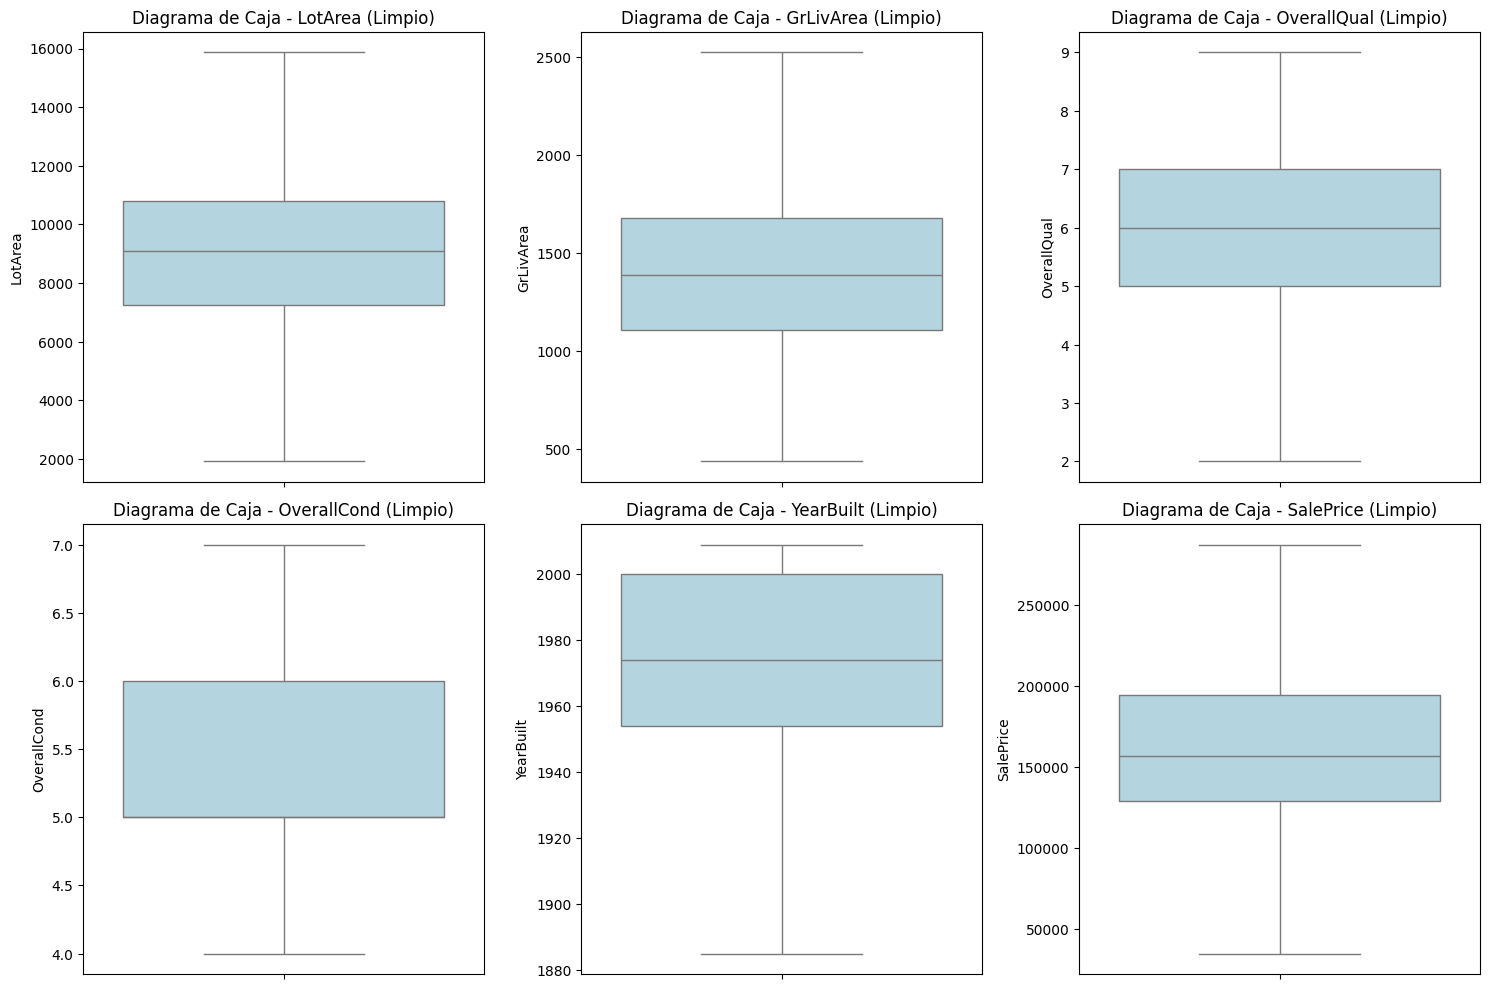

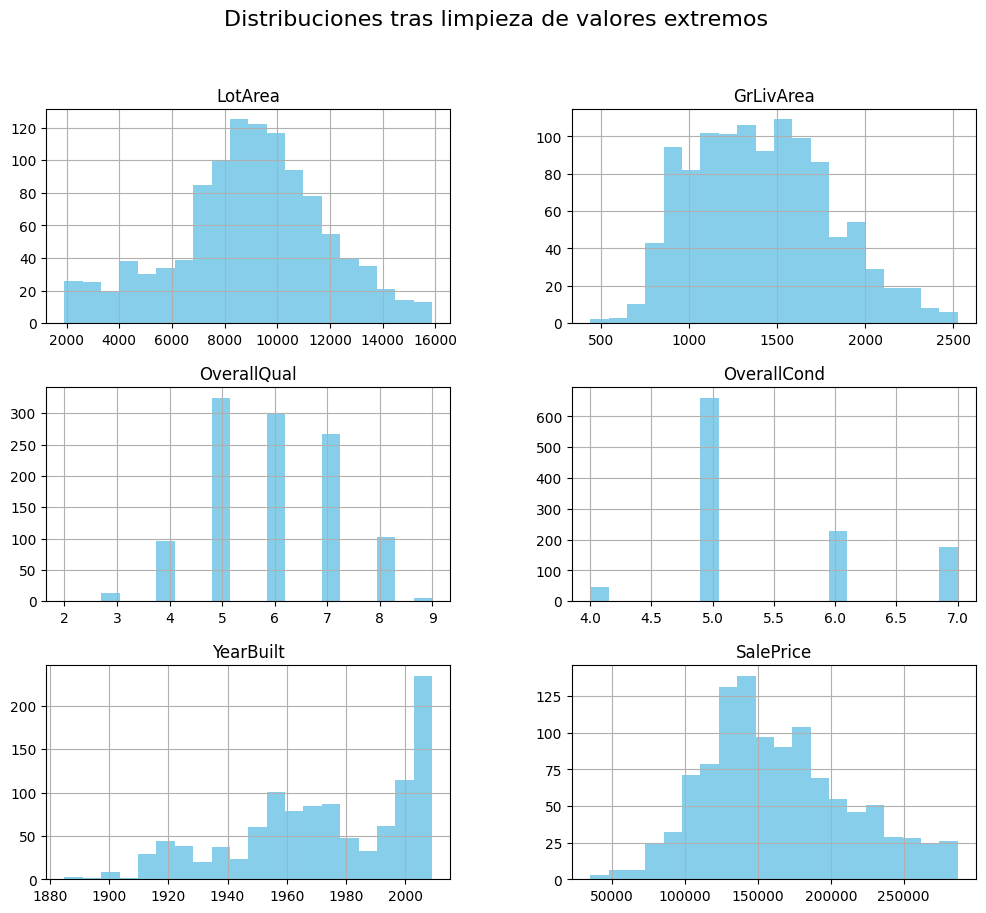

In [ ]:
# Lista completa de columnas importantes
important_columns = ['LotArea', 'GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']

# Función para eliminar valores atípicos usando el rango intercuartílico (IQR)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1                   # Rango intercuartílico
    lower_limit = Q1 - 1.5 * IQR    # Límite inferior
    upper_limit = Q3 + 1.5 * IQR    # Límite superior
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

# Aplicar eliminación de outliers para todas las columnas importantes
cleaned_data = train.copy()  # Crear una copia del dataset original

for col in important_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, col)

# Verificar los cambios tras limpiar las columnas importantes
print("\nTamaño original del dataset:", train.shape)
print("Tamaño tras limpieza de valores extremos:", cleaned_data.shape)

# Diagramas de caja actualizados para todas las variables clave tras limpieza
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=cleaned_data[col], color='lightblue')
    plt.title(f"Diagrama de Caja - {col} (Limpio)")
plt.tight_layout()
plt.show()

# Nuevos histogramas para confirmar las distribuciones tras la limpieza
cleaned_data[important_columns].hist(figsize=(12, 10), bins=20, color='skyblue')
plt.suptitle("Distribuciones tras limpieza de valores extremos", fontsize=16)
plt.show()

In [ ]:
print("\nValores nulos por columna:")
print(train.isnull().sum())


Valores nulos por columna:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      211
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


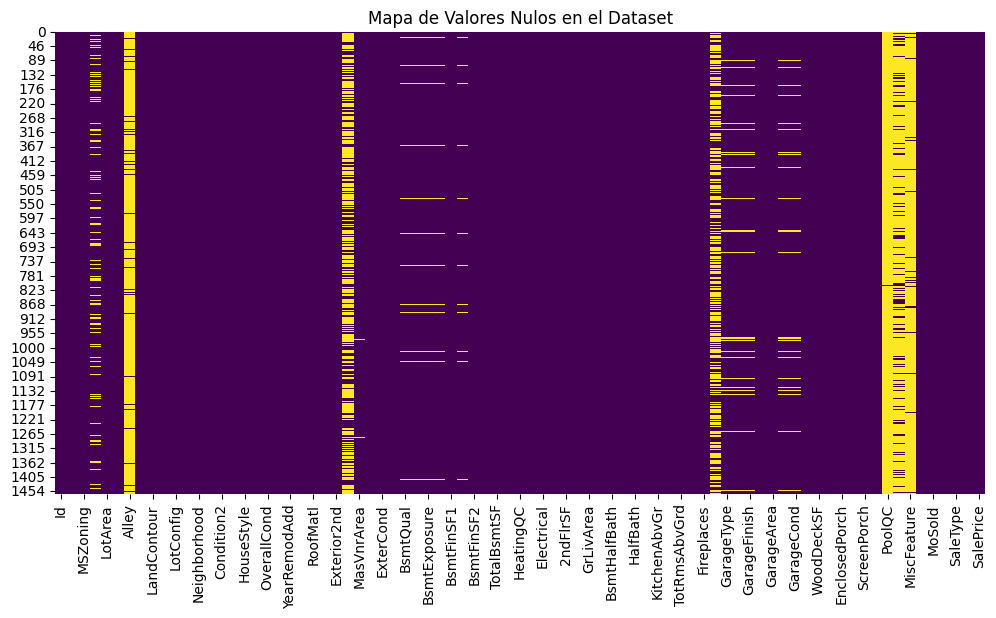

In [ ]:
# Visualización gráfica de valores nulos en el dataset
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Nulos en el Dataset")
plt.show()

1.2 Análisis de Correlación

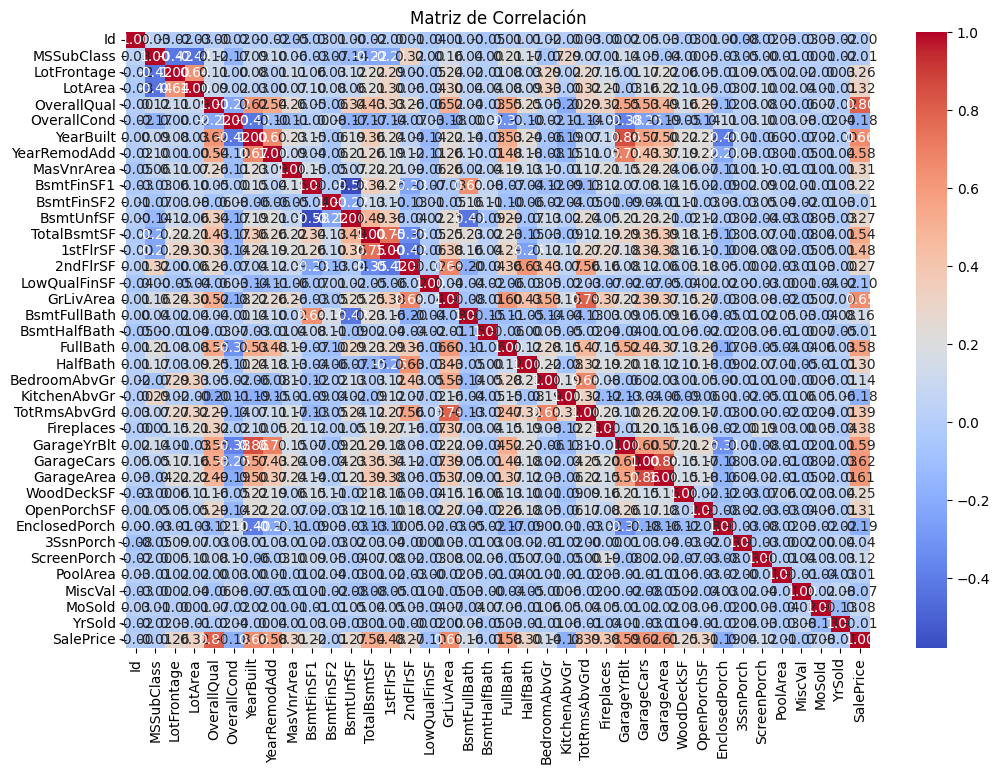


Correlación con SalePrice:
SalePrice        1.000000
OverallQual      0.799197
YearBuilt        0.657374
GrLivArea        0.650471
GarageCars       0.616240
GarageArea       0.607664
GarageYrBlt      0.587857
YearRemodAdd     0.584256
FullBath         0.576771
TotalBsmtSF      0.541846
1stFlrSF         0.478275
TotRmsAbvGrd     0.393359
Fireplaces       0.382828
LotArea          0.316145
MasVnrArea       0.306211
OpenPorchSF      0.305990
HalfBath         0.299271
2ndFlrSF         0.269735
BsmtUnfSF        0.265522
LotFrontage      0.263935
WoodDeckSF       0.252502
BsmtFinSF1       0.218124
BsmtFullBath     0.158713
BedroomAbvGr     0.139438
ScreenPorch      0.119598
MoSold           0.076770
3SsnPorch        0.038251
PoolArea         0.010625
Id              -0.002354
BsmtFinSF2      -0.008580
BsmtHalfBath    -0.011071
MSSubClass      -0.011787
YrSold          -0.014181
MiscVal         -0.067582
LowQualFinSF    -0.096049
KitchenAbvGr    -0.178035
OverallCond     -0.181842
EnclosedPo

In [ ]:
# Seleccionar solo columnas numéricas para calcular la matriz de correlación
numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cleaned_data[numeric_cols].corr()

# Graficar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Variables con alta correlación con SalePrice
print("\nCorrelación con SalePrice:")
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

In [ ]:
# Eliminación de variables irrelevantes y redundantes
columns_to_drop = ['Id', 'GarageArea', '1stFlrSF', 'PoolArea', '3SsnPorch', 'MoSold', 'YrSold', 'LowQualFinSF']
optimized_data = cleaned_data.drop(columns=columns_to_drop)

# Confirmar las columnas restantes
print("\nColumnas optimizadas:")
print(optimized_data.columns)

# Verificar tamaño del dataset
print(f"\nTamaño del dataset después de optimización: {optimized_data.shape}")


Columnas optimizadas:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPor

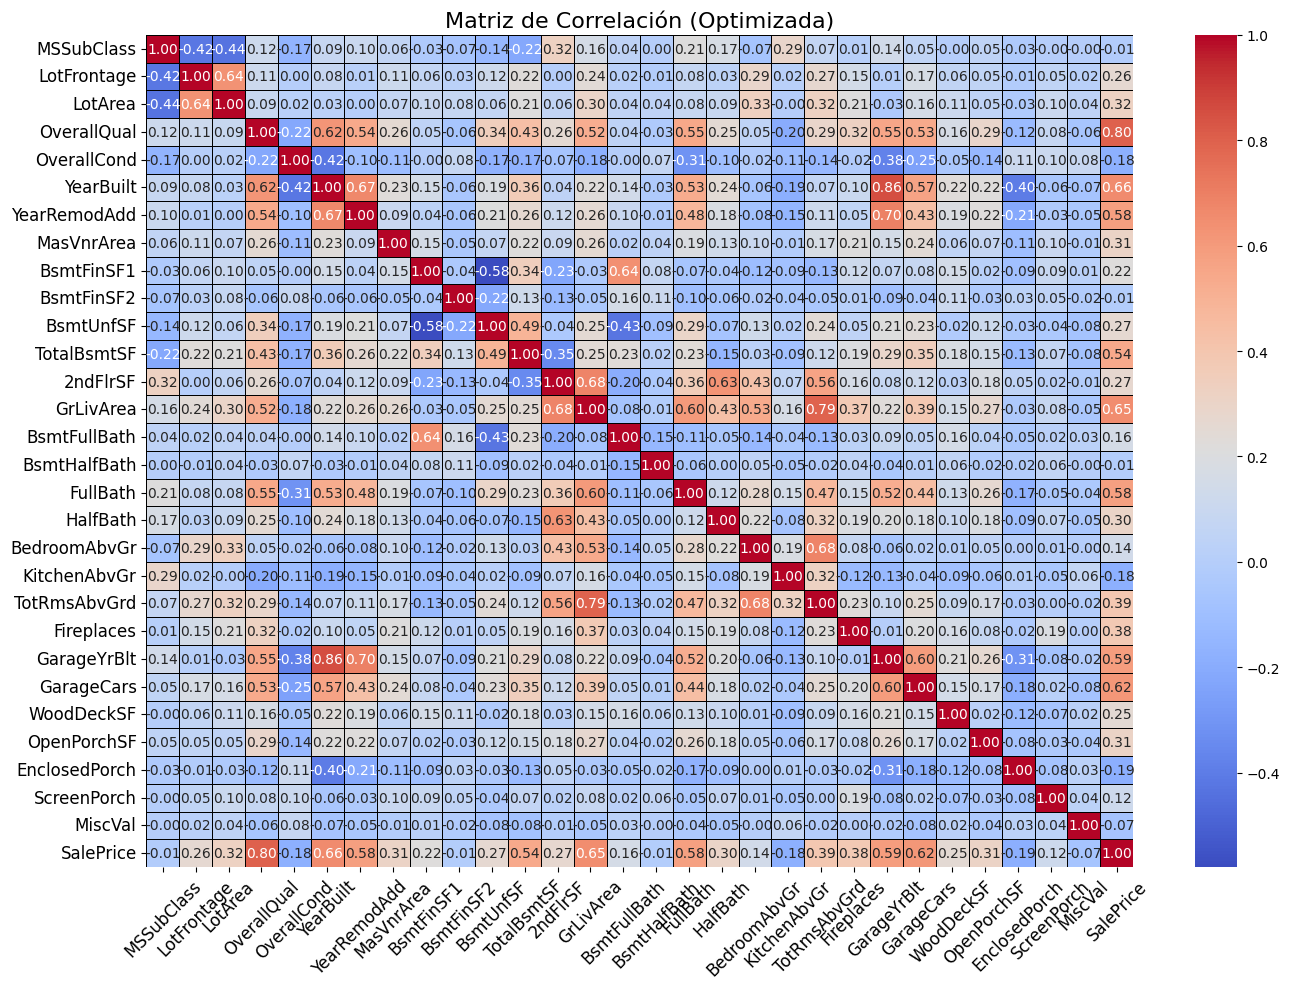

In [ ]:
# Seleccionar únicamente columnas numéricas para calcular la matriz de correlación
numeric_cols = optimized_data.select_dtypes(include=['float64', 'int64']).columns
optimized_correlation_matrix = optimized_data[numeric_cols].corr()
# Graficar la matriz de correlación con optimizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la figura
plt.figure(figsize=(14, 10))

# Matriz de correlación
optimized_correlation_matrix = optimized_data.select_dtypes(include=['float64', 'int64']).corr()

# Mapa de calor optimizado
sns.heatmap(
    optimized_correlation_matrix,
    annot=True,             # Mostrar valores numéricos
    annot_kws={"size": 10}, # Ajustar tamaño de los números
    cmap="coolwarm",        # Escala de colores para mejorar contraste
    fmt=".2f",              # Formato de los números (2 decimales)
    linewidths=0.5,         # Líneas entre celdas
    linecolor='black'       # Color de las líneas
)

# Títulos y configuraciones adicionales
plt.title("Matriz de Correlación (Optimizada)", fontsize=16)
plt.xticks(fontsize=12, rotation=45) # Rotar etiquetas del eje X para mayor legibilidad
plt.yticks(fontsize=12)              # Ajustar tamaño de etiquetas en el eje Y
plt.tight_layout()
plt.show()

1.3 Preprocesamiento de Datos

1.3.1 Manejo de Valores Faltantes

In [ ]:
# Imputación de valores faltantes en el dataset optimizado
from sklearn.impute import SimpleImputer

# Imputación de valores nulos para variables numéricas
num_imputer = SimpleImputer(strategy='median')
numeric_cols = optimized_data.select_dtypes(include=['float64', 'int64']).columns
optimized_data[numeric_cols] = num_imputer.fit_transform(optimized_data[numeric_cols])

# Imputación de valores nulos para variables categóricas
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = optimized_data.select_dtypes(include=['object']).columns
optimized_data[categorical_cols] = cat_imputer.fit_transform(optimized_data[categorical_cols])

print("\nValores nulos tras imputación:")
print(optimized_data.isnull().sum())


Valores nulos tras imputación:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscFeature      0
MiscVal          0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64


1.3.2 Codificación de Variables Categóricas


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
label_enc = LabelEncoder()
categorical_cols = optimized_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    optimized_data[col] = label_enc.fit_transform(optimized_data[col])

print("\nVista previa tras codificar variables categóricas:")
print(optimized_data.head())


Vista previa tras codificar variables categóricas:
   MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3         65.0   8450.0       1      1         3   
2        60.0         3         68.0  11250.0       1      1         0   
3        70.0         3         60.0   9550.0       1      1         0   
4        60.0         3         84.0  14260.0       1      1         0   
5        50.0         3         85.0  14115.0       1      1         0   

   LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0            3          0          4  ...         61.0            0.0   
2            3          0          4  ...         42.0            0.0   
3            3          0          0  ...         35.0          272.0   
4            3          0          2  ...         84.0            0.0   
5            3          0          4  ...         30.0            0.0   

   ScreenPorch  PoolQC  Fence  MiscFeature  MiscVal  SaleType  S

1.3.3 Normalización de Variables Numéricas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar las variables numéricas
scaler = MinMaxScaler()
optimized_data[numeric_cols] = scaler.fit_transform(optimized_data[numeric_cols])

print("\nVista previa de datos normalizados:")
print(optimized_data[numeric_cols].head())


Vista previa de datos normalizados:
   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.273292  0.468100     0.714286     0.333333   0.951613   
2    0.235294     0.291925  0.668817     0.714286     0.333333   0.935484   
3    0.294118     0.242236  0.546953     0.714286     0.333333   0.241935   
4    0.235294     0.391304  0.884588     0.857143     0.333333   0.927419   
5    0.176471     0.397516  0.874194     0.428571     0.333333   0.870968   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  TotRmsAbvGrd  \
0      0.883333     0.12250    0.375532         0.0  ...      0.555556   
2      0.866667     0.10125    0.258511         0.0  ...      0.333333   
3      0.333333     0.00000    0.114894         0.0  ...      0.444444   
4      0.833333     0.21875    0.348404         0.0  ...      0.666667   
5      0.750000     0.00000    0.389362         0.0  ...      0.222222   

   Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  Ope

1.4 División Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

# Separar la variable objetivo (SalePrice) y las variables independientes
X = optimized_data.drop(columns=['SalePrice'])  # Ajustar para mantener solo variables independientes
y = optimized_data['SalePrice']  # Variable objetivo

# División en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTamaños de los conjuntos:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Tamaños de los conjuntos:
X_train: (888, 72), y_train: (888,)
X_test: (222, 72), y_test: (222,)


2.Model Planning

2.1 Definición del problema

In [ ]:
print("Columnas disponibles en X_train:")
print(X_train.columns)

Columnas disponibles en X_train:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
     

In [ ]:
# Tipo de Modelo: Regresión con red neuronal
# Entrada: 12 características preprocesadas
# Salida: Predicción del precio
input_dim = 12  # Número de características de entrada
output_dim = 1  # Salida: Valor continuo (precio)

# Actualizar lista de características seleccionadas (según columnas disponibles)
selected_features = ['OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars', 'GarageYrBlt',
                     'YearRemodAdd', 'FullBath', 'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
                     'LotArea', 'WoodDeckSF']

# Ajustar los datos de entrenamiento y prueba
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Verificar las dimensiones ajustadas
print("\nTamaños después de la selección de características:")
print(f"X_train_selected: {X_train_selected.shape}, X_test_selected: {X_test_selected.shape}")


Tamaños después de la selección de características:
X_train_selected: (888, 12), X_test_selected: (222, 12)


2.2 Arquitectura de red


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Crear arquitectura de la red neuronal con regularización
def build_model_with_regularization():
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.01)),
        Dropout(0.2),  # Capa Dropout para evitar sobreajuste
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),  # Otra capa Dropout
        Dense(output_dim, activation='linear')  # Capa de salida con activación lineal
    ])
    return model

2.3 Función de Pérdida y Optimizador

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD

# Crear modelos con optimizadores diferentes
adam_model = build_model_with_regularization()
adam_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

sgd_model = build_model_with_regularization()
sgd_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mse', metrics=['mae', 'mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2.4 Evaluación del Modelo

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Función para evaluación del modelo con K-Fold
def evaluate_model(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    maes, rmses, normalized_rmses, r2s = [], [], [], []

    for train_index, val_index in kf.split(X):
        # Filtrar conjuntos de entrenamiento y validación
        X_train_k, X_val_k = X.iloc[train_index], X.iloc[val_index]
        y_train_k, y_val_k = y.iloc[train_index], y.iloc[val_index]

        # EarlyStopping para detener el entrenamiento si no hay mejora en la pérdida
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Entrenamiento con 500 epochs
        model.fit(X_train_k, y_train_k, epochs=500, batch_size=32, verbose=0, validation_data=(X_val_k, y_val_k),
                  callbacks=[early_stopping])

        # Predicción
        y_pred = model.predict(X_val_k)

        # Calcular métricas
        mae = mean_absolute_error(y_val_k, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val_k, y_pred))
        normalized_rmse = (rmse / np.mean(y_val_k)) * 100  # RMSE como porcentaje
        r2 = r2_score(y_val_k, y_pred)

        maes.append(mae)
        rmses.append(rmse)
        normalized_rmses.append(normalized_rmse)
        r2s.append(r2)

    # Promedio de métricas
    print("\nEvaluación del modelo:")
    print(f"MAE (valor absoluto): {np.mean(maes):.4f}")
    print(f"RMSE (valor absoluto): {np.mean(rmses):.4f}")
    print(f"RMSE (% del valor medio): {np.mean(normalized_rmses):.2f}%")
    print(f"R²: {np.mean(r2s):.4f}")

# Evaluar el modelo con Adam usando las características seleccionadas
print("Evaluación con Adam:")
evaluate_model(adam_model, X_train_selected, y_train)

# Evaluar el modelo con SGD usando las características seleccionadas
print("\nEvaluación con SGD:")
evaluate_model(sgd_model, X_train_selected, y_train)

Evaluación con Adam:
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Evaluación del modelo:
MAE (valor absoluto): 0.0603
RMSE (valor absoluto): 0.0819
RMSE (% del valor medio): 16.00%
R²: 0.8187

Evaluación con SGD:
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Evaluación del modelo:
MAE (valor absoluto): 0.0615
RMSE (valor absoluto): 0.0833
RMSE (% del valor medio): 16.27%
R²: 0.8128


In [ ]:
print("Forma de y_pred:", y_pred.shape)

Forma de y_pred: (222, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

MAPE con Adam: 25.46558160236627


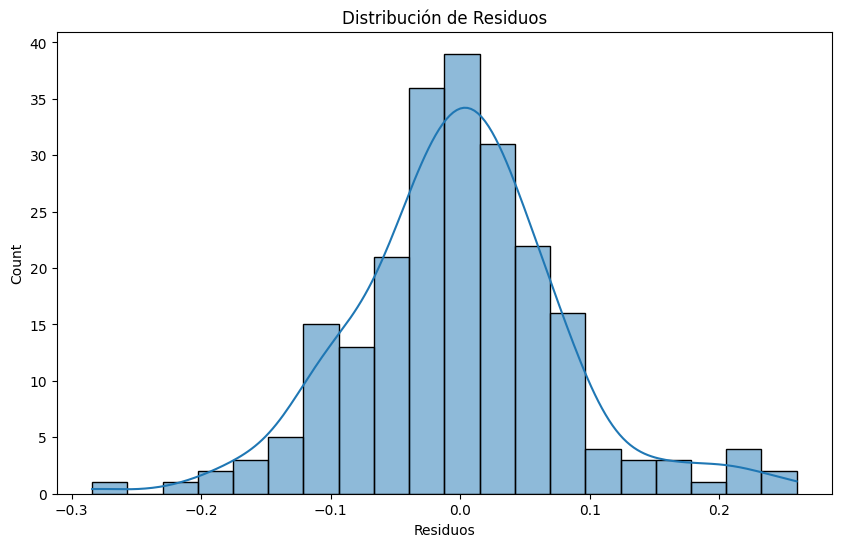

In [ ]:
# Predicción final y análisis de residuos
y_pred = adam_model.predict(X_test_selected).flatten()  # Convertir a vector unidimensional
y_test = y_test.values if hasattr(y_test, 'values') else y_test  # Convertir si es pandas Series

# Chequear dimensiones
assert len(y_test) == len(y_pred), "Dimensiones de y_test y y_pred no coinciden"

# Cálculo de MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("\nMAPE con Adam:", mape)

# Gráfico de residuos
residuals = y_test - y_pred
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # Crear histograma con distribución KDE
plt.title("Distribución de Residuos")
plt.xlabel("Residuos")
plt.show()

In [ ]:
adam_model.save('adam_model.h5')
